# Logistische Regression

## Bibliotheken und Daten einlesen

In [1]:
# Bibliotheken einbinden
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Daten importieren
obst = pd.read_csv("obst.csv", sep=";")

In [3]:
# Daten ausgeben
obst.head()

,Hoehe,Breite,Frucht
0,9.3,9.7,Orange
1,9.2,9.3,Orange
2,9.5,8.9,Orange
3,9.3,7.5,Orange
4,8.3,7.7,Orange


## Feature Engineering

In [4]:
# Quotient Höhe durch Breite berechnen
obst["Hoehe_durch_Breite"]=obst["Hoehe"]/obst["Breite"]

In [5]:
# Daten ausgeben
obst.head()

,Hoehe,Breite,Frucht,Hoehe_durch_Breite
0,9.3,9.7,Orange,0.958763
1,9.2,9.3,Orange,0.989247
2,9.5,8.9,Orange,1.067416
3,9.3,7.5,Orange,1.240000
4,8.3,7.7,Orange,1.077922


In [6]:
# Daten in Feature-Matrix und Target-Vektor splitten
features = obst.iloc[:, 3]
target = obst.iloc[:, 2].replace(to_replace=['Orange', 'Zitrone'], value=[0, 1]) #iris.target

## Modell trainieren

In [7]:
# Features in NumPy-Array konvertieren
features_arr = np.array(features).reshape(-1,1)

In [8]:
# Logistic Regression Objekt erzeugen
logr = linear_model.LogisticRegression()
logr.fit(features_arr, target)

LogisticRegression()

## Ergebnis visualisieren

In [9]:
# y-Werte der Regressions-Kurve berechnen
x_grid = np.array([0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]).reshape(-1,1)
y_grid = 1/(1+np.exp(-logr.intercept_-logr.coef_*x_grid)) 

# Klasse für Trainings-Daten vorhersagen
target_pred = logr.predict(features_arr)


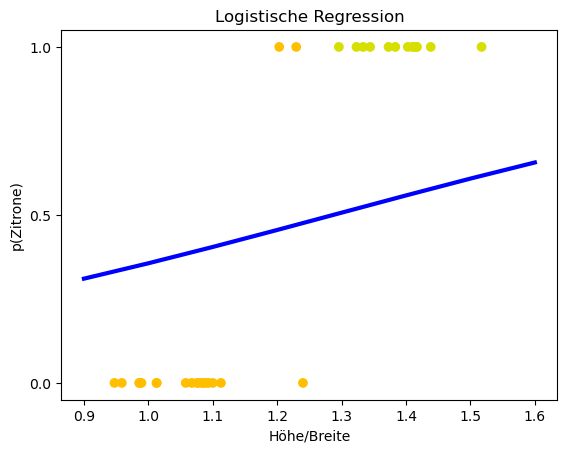

In [10]:
# Punkte und Kurve plotten - Klassenzuordnung kennzeichnen
cmap_log = ListedColormap(['#FFBF00', '#D7DF01'])

plt.scatter(features_arr, target, c=target_pred, cmap=cmap_log)
plt.plot(x_grid, y_grid, color="blue", linewidth=3)

plt.xticks(([0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]))
plt.yticks(([0, 0.5, 1]))
plt.title("Logistische Regression")
plt.xlabel("Höhe/Breite")
plt.ylabel("p(Zitrone)")

plt.show()